In [1]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')

In [3]:
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

In [5]:
codes = {'UA': 'United Air Lines Inc.', 
        'B6': 'JetBlue Airways',
        'DL': 'Delta Air Lines Inc.',
        'AA': 'American Airlines Inc.',
        'NK': 'Spirit Air Lines', 
        'WN': 'Southwest Airlines Co.',
        'G4': 'Allegiant Air', 
        'HA': 'Hawaiian Airlines Inc.',
        'F9': 'Frontier Airlines Inc.',
        'AS': 'Alaska Airlines Inc.',
        'VX': 'Virgin America'}

In [6]:
airline_flights = pd.DataFrame(flights_df.groupby('mkt_carrier')['fl_date'].count().sort_values(ascending=False).reset_index()).rename({'mkt_carrier': 'Airline_code', 'fl_date': 'Flight Counts'}, axis=1)
airline_flights['Airlines'] = airline_flights['Airline_code'].replace(codes)

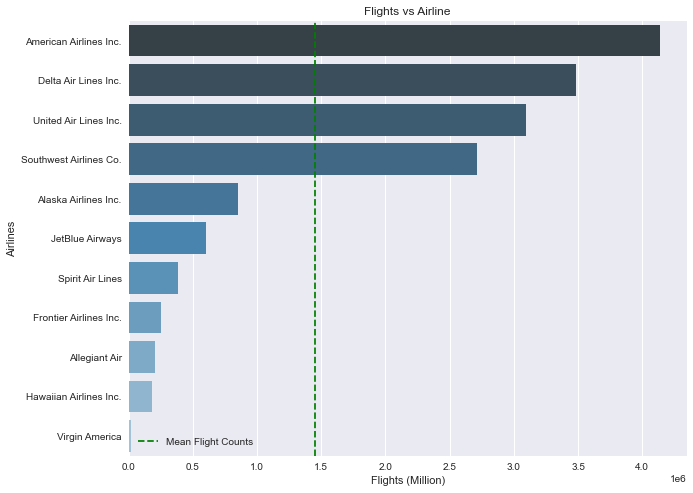

In [13]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1 = sns.barplot(x='Flight Counts', y='Airlines',data= airline_flights, palette=("Blues_d"))

ax1.set(title='Flights vs Airline', xlabel='Flights (Million)');

ax1.axvline(airline_flights['Flight Counts'].mean(), label='Mean Flight Counts', color='green', ls='--')
plt.legend(loc='bottom left')

## Delays

####  departure delay rate by carriers

In [8]:
total_flights = pd.DataFrame(flights_df.groupby('mkt_carrier')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)

total_flights

,mkt_carrier,total_flights
0,AA,4138991
1,AS,853796
2,B6,600928
3,DL,3487118
4,F9,255388
5,G4,201464
6,HA,184622
7,NK,380654
8,UA,3092995
9,VX,17566


In [9]:
delayed_flights15 = pd.DataFrame(flights_df.loc[flights_df['dep_delay'] > 15].groupby('mkt_carrier')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)
flights_departure_delayed = pd.merge(left=delayed_flights15, right=total_flights, on='mkt_carrier')
flights_departure_delayed['dep_delayed_frac'] = flights_departure_delayed['total_flights_x']/flights_departure_delayed['total_flights_y']
flights_departure_delayed['mkt_carrier'] = flights_departure_delayed['mkt_carrier'].replace(codes)

In [11]:
arrived_flights15 = pd.DataFrame(flights_df.loc[flights_df['arr_delay'] > 15].groupby('mkt_carrier')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)
flights_arrival_delayed = pd.merge(left=arrived_flights15, right=total_flights, on='mkt_carrier')
flights_arrival_delayed['arr_delayed_frac'] = flights_departure_delayed['total_flights_x']/flights_departure_delayed['total_flights_y']
flights_arrival_delayed['mkt_carrier'] = flights_arrival_delayed['mkt_carrier'].replace(codes)
flights_arrival_delayed

,mkt_carrier,total_flights_x,total_flights_y,arr_delayed_frac
0,American Airlines Inc.,788333,4138991,0.175443
1,Alaska Airlines Inc.,134302,853796,0.133771
2,JetBlue Airways,151442,600928,0.252355
3,Delta Air Lines Inc.,527865,3487118,0.149140
4,Frontier Airlines Inc.,66315,255388,0.262804
5,Allegiant Air,41273,201464,0.193717
6,Hawaiian Airlines Inc.,19782,184622,0.082325
7,Spirit Air Lines,67176,380654,0.169380
8,United Air Lines Inc.,634210,3092995,0.182772
9,Virgin America,3311,17566,0.166743


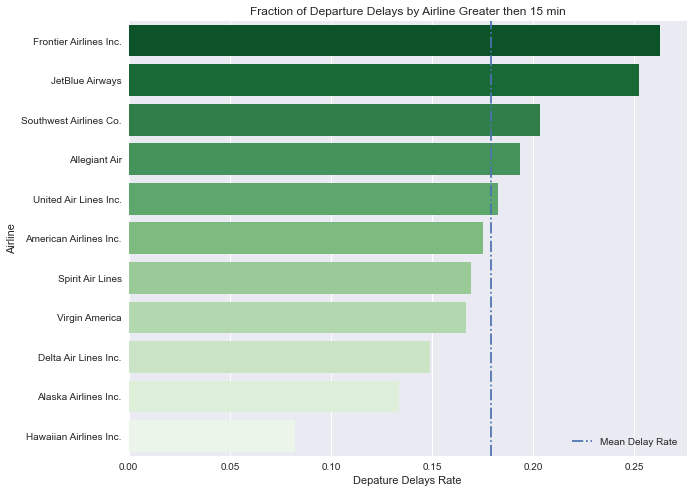

In [21]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1 = sns.barplot(x='dep_delayed_frac', y='mkt_carrier', data=flights_departure_delayed.sort_values(by='dep_delayed_frac', ascending=False), palette=("Greens_r"))
ax1.set(title='Fraction of Departure Delays by Airline Greater then 15 min', xlabel='Depature Delays Rate', ylabel='Airline');


ax1.axvline(flights_departure_delayed['dep_delayed_frac'].mean(), ls='-.', label='Mean Delay Rate')
ax1.legend()

In [64]:
####  Arrival delay rate by carriers

In [65]:
arrived_flights15 = pd.DataFrame(flights_df.loc[flights_df['arr_delay'] > 15].groupby('mkt_carrier')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)
flights_arrival_delayed = pd.merge(left=arrived_flights15, right=total_flights, on='mkt_carrier')
flights_arrival_delayed['arr_delayed_frac'] = flights_departure_delayed['total_flights_x']/flights_departure_delayed['total_flights_y']
flights_arrival_delayed['mkt_carrier'] = flights_arrival_delayed['mkt_carrier'].replace(codes)
flights_arrival_delayed

,mkt_carrier,total_flights_x,total_flights_y,arr_delayed_frac
0,American Airlines Inc.,788333,4138991,0.175443
1,Alaska Airlines Inc.,134302,853796,0.133771
2,JetBlue Airways,151442,600928,0.252355
3,Delta Air Lines Inc.,527865,3487118,0.149140
4,Frontier Airlines Inc.,66315,255388,0.262804
5,Allegiant Air,41273,201464,0.193717
6,Hawaiian Airlines Inc.,19782,184622,0.082325
7,Spirit Air Lines,67176,380654,0.169380
8,United Air Lines Inc.,634210,3092995,0.182772
9,Virgin America,3311,17566,0.166743


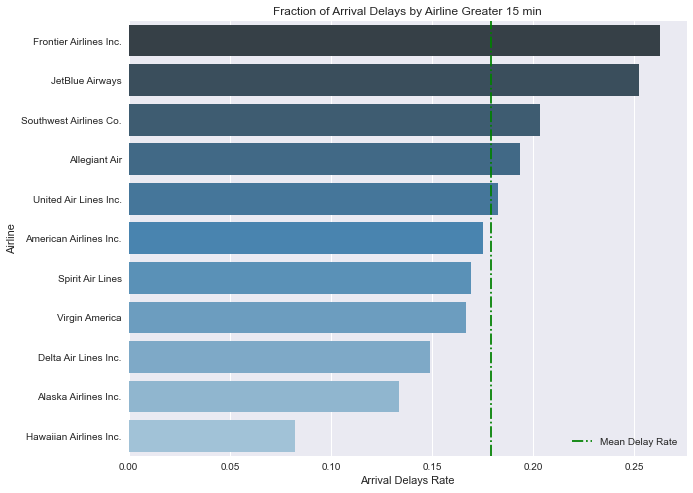

In [22]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = sns.barplot(x='arr_delayed_frac', y='mkt_carrier', data=flights_arrival_delayed.sort_values(by='arr_delayed_frac', ascending=False), palette=("Blues_d"))
ax2.set(title='Fraction of Arrival Delays by Airline Greater 15 min', xlabel='Arrival Delays Rate', ylabel='Airline');

ax1.axvline(flights_arrival_delayed['arr_delayed_frac'].mean(), color='green', ls='-.', label='Mean Delay Rate')
ax1.legend()

In [69]:
# Departure and Arrival delays are similar between both airlines
# Alska and Hawaiian Airlines exhibited the lowest Delay rates

#### Mean Arrival/Delays by airline

In [23]:
delays_airline = flights_df.groupby('mkt_carrier')['dep_delay', 'arr_delay'].mean().reset_index()
delays_airline['Airline'] = delays_airline['mkt_carrier'].replace(codes)

delays_airline

,mkt_carrier,dep_delay,arr_delay,Airline
0,AA,10.289777,6.407416,American Airlines Inc.
1,AS,3.669697,0.746585,Alaska Airlines Inc.
2,B6,16.796378,11.328906,JetBlue Airways
3,DL,9.347935,2.511255,Delta Air Lines Inc.
4,F9,16.971048,11.294149,Frontier Airlines Inc.
5,G4,11.458060,8.948751,Allegiant Air
6,HA,1.530184,1.245525,Hawaiian Airlines Inc.
7,NK,10.442608,5.135043,Spirit Air Lines
8,UA,12.854547,9.095866,United Air Lines Inc.
9,VX,6.333005,1.727978,Virgin America


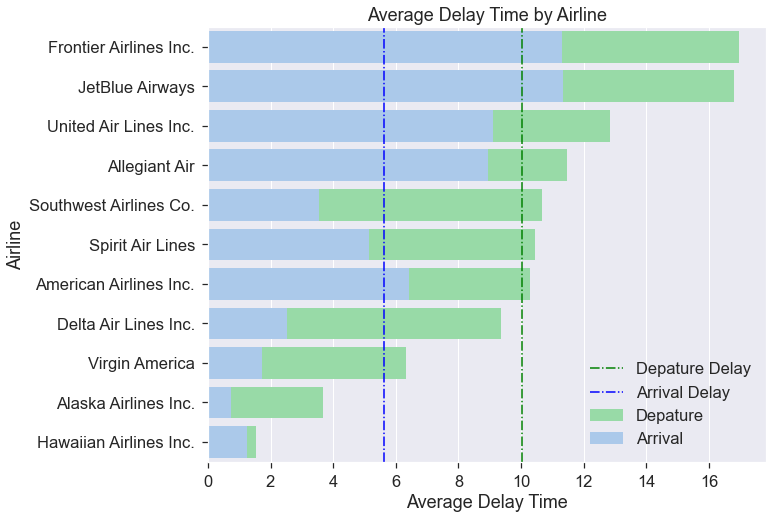

In [26]:
fig, ax3 = plt.subplots(figsize=(10,8))

ax3 = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax3 = sns.barplot(x="dep_delay", y="Airline", data=delays_airline.sort_values('dep_delay', ascending=False),
            label="Depature", color="g")
ax3 = sns.barplot(x="arr_delay", y="Airline", data=delays_airline.sort_values('dep_delay', ascending=False),
            label="Arrival", color="b")
ax3.set(title='Average Delay Time by Airline',xlabel="Average Delay Time")

ax3.axvline(delays_airline['dep_delay'].mean(), label='Depature Delay',ls='-.', color='green')
ax3.axvline(delays_airline['arr_delay'].mean(), label='Arrival Delay', ls='-.', color='blue')
plt.legend();

In [90]:
# Frontier and Jetblue have longest mean delay times
# Alaska and Hawiian Airlines among the lowest delat times
# Departure delays are longer then Arrival
# We can greatly reduce Delays by addressing Departure

#### Cancelled Rates per airline

In [17]:
cancelled_flights = flights_df.loc[(flights_df['cancelled'] == 1)].groupby('mkt_carrier')['fl_date'].count().reset_index().rename({'fl_date': 'cancelled_count'},axis=1)

In [21]:
# Create new dataframe merging total flights and cancelled flights
# Get fractions
cancelled_frac = pd.merge(left=cancelled_flights, right=total_flights, on='mkt_carrier')
cancelled_frac['cancelled_frac'] = cancelled_frac['cancelled_count']/cancelled_frac['total_flights']
cancelled_frac['Airline'] = cancelled_frac['mkt_carrier'].replace(codes)
cancelled_frac

,mkt_carrier,cancelled_count,total_flights,cancelled_frac,Airline
0,AA,103455,4138991,0.024995,American Airlines Inc.
1,AS,10503,853796,0.012302,Alaska Airlines Inc.
2,B6,8712,600928,0.014498,JetBlue Airways
3,DL,24165,3487118,0.006930,Delta Air Lines Inc.
4,F9,4421,255388,0.017311,Frontier Airlines Inc.
5,G4,1335,201464,0.006626,Allegiant Air
6,HA,1313,184622,0.007112,Hawaiian Airlines Inc.
7,NK,4958,380654,0.013025,Spirit Air Lines
8,UA,60586,3092995,0.019588,United Air Lines Inc.
9,VX,330,17566,0.018786,Virgin America


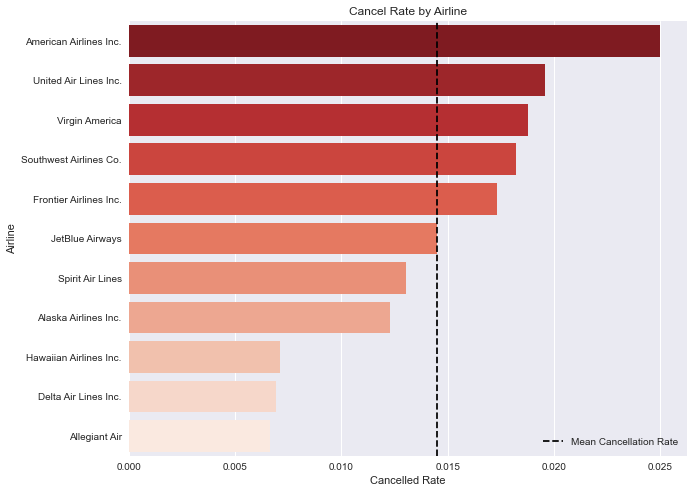

In [30]:
fig, ax6 = plt.subplots(figsize=(10,8))

ax6 = sns.barplot(x='cancelled_frac', 
                  y='Airline', 
                  data=cancelled_frac.sort_values('cancelled_frac', ascending=False), 
                  palette='Reds_r')

ax6.axvline(cancelled_frac['cancelled_frac'].mean(), label='Mean Cancellation Rate',color='black', ls='--')
                        
ax6.set(title='Cancel Rate by Airline', xlabel='Cancelled Rate')

plt.legend()

In [29]:
# Delta, Alaska, Hawaiian Airlines amongst the lowest cancellation rates
# American Airlines worst 2.4% of all flights wll be cancelled
# Following United Air and Virgin Air amongst the highest cancellation rates

#### Airline on time percentage (most on time airline)

In [27]:
total_flights

,mkt_carrier,total_flights
0,AA,4138991
1,AS,853796
2,B6,600928
3,DL,3487118
4,F9,255388
5,G4,201464
6,HA,184622
7,NK,380654
8,UA,3092995
9,VX,17566


In [28]:
ontime_departure_airlines = flights_df.loc[flights_df['dep_delay'] <= 0].groupby('mkt_carrier')['fl_date'].count().reset_index().rename({'fl_date': 'total_flights'}, axis=1)
ontime_departure_airlines.sort_values(by='total_flights', ascending=False)

,mkt_carrier,total_flights
0,AA,2714477
3,DL,2455798
8,UA,2129648
10,WN,1380864
1,AS,605429
2,B6,352461
7,NK,259696
4,F9,145161
5,G4,133924
6,HA,131776


In [29]:
merged_ontime = pd.merge(left=ontime_departure_airlines, right=total_flights, on='mkt_carrier')
merged_ontime['ontime_frac'] = merged_ontime['total_flights_x']/merged_ontime['total_flights_y']
merged_ontime['Airline'] = merged_ontime['mkt_carrier'].replace(codes)
merged_ontime

,mkt_carrier,total_flights_x,total_flights_y,ontime_frac,Airline
0,AA,2714477,4138991,0.655831,American Airlines Inc.
1,AS,605429,853796,0.709103,Alaska Airlines Inc.
2,B6,352461,600928,0.586528,JetBlue Airways
3,DL,2455798,3487118,0.704249,Delta Air Lines Inc.
4,F9,145161,255388,0.568394,Frontier Airlines Inc.
5,G4,133924,201464,0.664754,Allegiant Air
6,HA,131776,184622,0.713761,Hawaiian Airlines Inc.
7,NK,259696,380654,0.682236,Spirit Air Lines
8,UA,2129648,3092995,0.688539,United Air Lines Inc.
9,VX,11859,17566,0.675111,Virgin America


In [30]:
ontime_arrival_airlines = flights_df.loc[flights_df['arr_delay'] <= 0].groupby('mkt_carrier')['fl_date'].count().reset_index().rename({'fl_date': 'total_flights'}, axis=1)
merged_ontime_arr = pd.merge(left=ontime_arrival_airlines, right=total_flights, on='mkt_carrier')
merged_ontime_arr['ontime_frac'] = merged_ontime_arr['total_flights_x']/merged_ontime['total_flights_y']
merged_ontime_arr['Airline'] = merged_ontime_arr['mkt_carrier'].replace(codes)
merged_ontime_arr

,mkt_carrier,total_flights_x,total_flights_y,ontime_frac,Airline
0,AA,2539052,4138991,0.613447,American Airlines Inc.
1,AS,545952,853796,0.639441,Alaska Airlines Inc.
2,B6,352547,600928,0.586671,JetBlue Airways
3,DL,2438717,3487118,0.699350,Delta Air Lines Inc.
4,F9,145389,255388,0.569287,Frontier Airlines Inc.
5,G4,122930,201464,0.610183,Allegiant Air
6,HA,120782,184622,0.654212,Hawaiian Airlines Inc.
7,NK,252238,380654,0.662644,Spirit Air Lines
8,UA,1922754,3092995,0.621648,United Air Lines Inc.
9,VX,10815,17566,0.615678,Virgin America


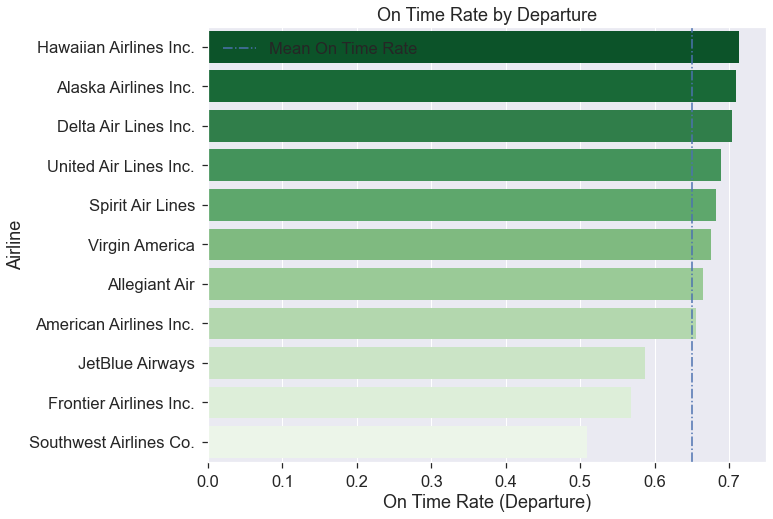

In [31]:
fig, ax5 = plt.subplots(figsize=(10,8))

ax5 = sns.barplot(x='ontime_frac', y='Airline', data=merged_ontime.sort_values('ontime_frac', ascending=False), palette=("Greens_r"))
ax5.set(title='On Time Rate by Departure', xlabel='On Time Rate (Departure)');

ax5.axvline(merged_ontime['ontime_frac'].mean(), ls='-.', label='Mean On Time Rate')

ax5.legend()

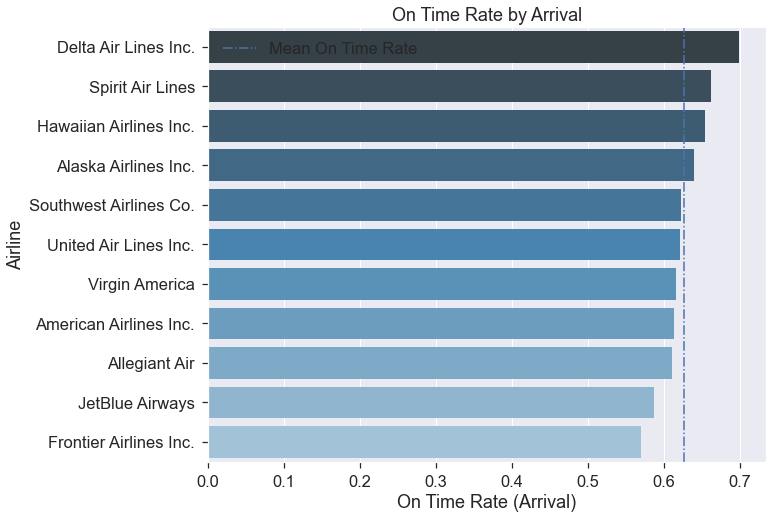

In [32]:
fig, ax4 = plt.subplots(figsize=(10,8))

ax4 = sns.barplot(x='ontime_frac', y='Airline', data=merged_ontime_arr.sort_values('ontime_frac', ascending=False), palette=("Blues_d"))
ax4.set(title='On Time Rate by Arrival', xlabel='On Time Rate (Arrival)');

ax4.axvline(merged_ontime_arr['ontime_frac'].mean(), ls='-.', label='Mean On Time Rate')

ax4.legend()

In [ ]:
# Hawain airlines, Alaska Airlines, Delta Airlines have highest on time departure rate
# Delta Airlines, Alaska Airlines, Sprit Airlines, Hawaiian Airlines have highest on time arrival rate

In [115]:
# Check flight speeds
# Frontier and Jet Blue Among the Worst on time rates for both Arrival and Departure ontime rates

#### Flightspeeds for each airline 

In [4]:
# Get all rows where distances and airtime are not NaN values
flightspeeds = flights_df.loc[(flights_df['distance'].notna()) & (flights_df['air_time'])]
flightspeeds['flight_speed'] = (flightspeeds['distance']/flightspeeds['air_time'])*96.56

# getting rid of outliers
flightspeeds = flightspeeds.loc[(flightspeeds['flight_speed'] < 2000) & (flightspeeds['flight_speed'] > 300)]
flightspeeds['Airline'] = flightspeeds['mkt_carrier'].replace(codes)

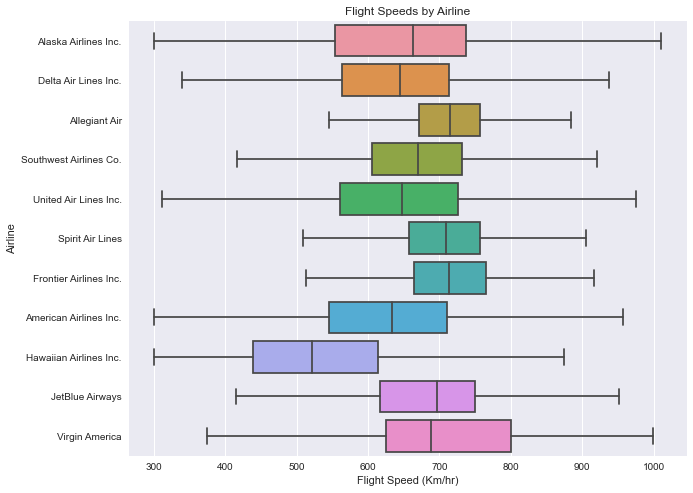

In [9]:
fig, ax5 = plt.subplots(figsize=(10,8))

ax5 = sns.boxplot(x='flight_speed', 
                  y='Airline', 
                  data=flightspeeds[['Airline', 'flight_speed']].sort_values('flight_speed', ascending=False), 
                  showfliers = False)

ax5.set(xlabel='Flight Speed (Km/hr)', title='Flight Speeds by Airline');

In [10]:
flightspeeds.groupby('Airline')['flight_speed'].mean().sort_values(ascending=False).reset_index()

,Airline,flight_speed
0,Frontier Airlines Inc.,715.454481
1,Allegiant Air,713.557928
2,Spirit Air Lines,704.627912
3,Virgin America,703.203998
4,JetBlue Airways,676.891772
5,Southwest Airlines Co.,667.708900
6,Alaska Airlines Inc.,642.655259
7,United Air Lines Inc.,639.478632
8,Delta Air Lines Inc.,636.346009
9,American Airlines Inc.,623.918591


In [59]:
# While Delta Airlines and Haiwiian the among the slowest mean speeds but had a lower ontime arrival rate